## Using the N-Body Method

Having written an n-body right hand side function and bound the gravitational acceleration, lets try it out!

Begin by resurrecting your ode code and doing some runs with initial conditions provided below. We know our best bet will be the Euler-Richardson algorithm. Integrate through 100 time units and plot the result.

I've left plotting code to save you some time with that.

For each of the initial conditions, find the maximum allowable time step the allows visually acceptable repeating orbits for 100 time steps. Record those time steps for future reference.

After completing that exercise, implement the fourth order Runge Kutta algorithm as part of your ODE solving function and repeat the above exercise. Are you doing better in terms of time steps? What about the number of function calls.

**Note:** I've tried to save you the hassle of writing plotting code. I figure you've done enough of that this semester. The problem is, I don't think mine is especially tidy. If you feel like replacing mine with something better, by all means, go for it.

### Runge Kutta

The simplest but steadiest performance can be realized with the *fourth order Runge-Kutta* integration methods. The following equations haver errors of order $\mathcal{O}(\Delta t^5)$. They can be expressed as.

$$
\begin{align}
k_1 &=& &\Delta t f(t_n,y_n)\\
k_2 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n + \frac{1}{2} k_1)\\
k_3 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n + \frac{1}{2} k_2)\\
k_4 &=& &\Delta t f(t_n + \frac{1}{2}\Delta t,y_n +  k_3)
\end{align}
$$

$$y_{n+1} = y_n + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 $$

In [65]:
import numpy as np
# Order is all coordinates then all velocities in groups by mass:
# x1,y1,x2,y2,x3,y3,vx1,vy1,vx2,vy2,etc
euler      = np.array([0,0,1,0,-1,0,0,0,0,.8,0,-.8])

montgomery = np.array([0.97000436,-0.24308753,-0.97000436,0.24308753, 0., 0.,\
                    0.466203685, 0.43236573, 0.466203685, 0.43236573,\
                   -0.93240737,-0.86473146])
lagrange   = np.array([1.,0.,-0.5,0.866025403784439, -0.5,-0.866025403784439,\
                  0.,0.8,-0.692820323027551,-0.4, 0.692820323027551, -0.4])

p3 = {'m':[1,1,1],'G':1,'dimension':2,'acceleration':gravitational,'fix_first':False}

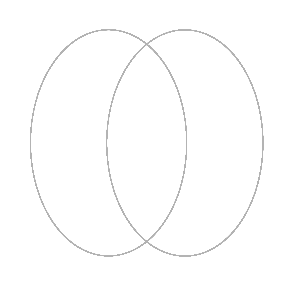

In [68]:
from ode import *
from n_body_rhs import *
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML

plt.style.use('dark_background')
%matplotlib inline

y0 = euler
p  = p3
dt = 1  # This is wrong - figure it out!
t_span = [0,100]

t_s,y = solve_ode(n_body,t_span, y0, EulerRichardson, p,first_step=dt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')
plt.show()

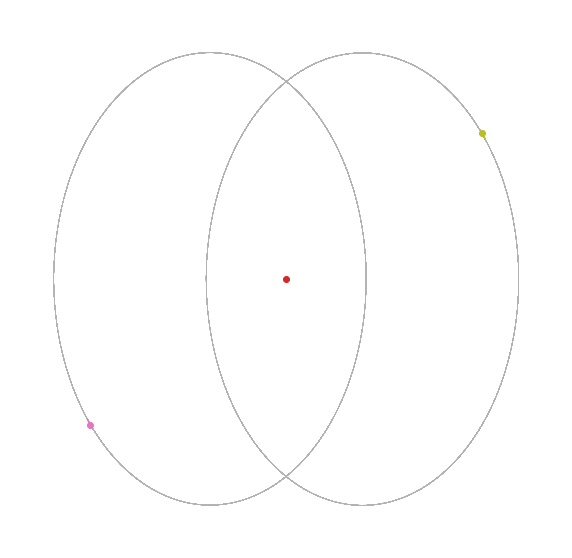

In [67]:
d = p['dimension']
trace_length = 20
c=['tab:red','tab:olive','tab:pink','tab:cyan','tab:purple']
body_list = []
trace_list = []

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

x_min,x_max,y_min,y_max = 1e9,-1e9,1e9,-1e9
for i in range(0,y0.size//d,d):
    x_t = y[:,i]
    y_t = y[:,i+1]
    if x_min > x_t.min(): x_min = x_t.min()
    if x_max < x_t.max(): x_max = x_t.max()
    if y_min > y_t.min(): y_min = y_t.min()
    if y_max < y_t.max(): y_max = y_t.max()

    ph, =  ax.plot(x_t,y_t,'-',color=[.7,.7,.7],linewidth=.5) 

plt.xlim([1.2*x_min,1.2*x_max])
plt.ylim([1.2*y_min,1.2*y_max])

ax.axis('off')

for i in range(0,y0.size//d,d):
    ph, =  ax.plot(y0[i],y0[i+1],'o',color=c[i//d]); 
    body_list.append( ph )
    ph, = ax.plot([],[],'-',color=c[i//d])
    trace_list.append( ph )

def animate(i):
    i = i % t_s.size
    for im,j in zip(body_list,range(0,d*len(body_list),d)):
        im.set_xdata( y[i+1,j] )
        im.set_ydata( y[i+1,j+1] )

    if i>trace_length:
        for im,j in zip(trace_list,range(0,d*len(trace_list),d)):
            im.set_xdata( y[i-trace_length:i+1,j] )
            im.set_ydata( y[i-trace_length:i+1,j+1] )
    return im

anim = animation.FuncAnimation(fig, animate, interval=20,frames=FRAMES) 

HTML(anim.to_html5_video())